In [23]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [34]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import tifffile as tif
from sladsnet.code.base import Sample
from sladsnet.code.erd import SladsSklearnModel
from sladsnet.code.measurement_interface import TransmissionSimulationMeasurementInterface
from sladsnet.code.results import Result
from sladsnet.code.sampling import run_sampling
from sladsnet.input_params import ERDInputParams, GeneralInputParams, SampleParams
from sladsnet.code.utils import renormalize_to_grayscale

In [25]:
base_path = Path.cwd().parent

In [26]:
cameraman_path = base_path / 'ResultsAndData/TrainingData/cameraman/'
test_path = base_path / 'ResultsAndData/TestingImages/cameraman/'
output_path = base_path / 'ResultsAndData/SladsResults/cameraman_to_cameraman'

In [27]:
output_path.mkdir(parents=True, exist_ok=True)

In [28]:
imgs_path = test_path #/ 'Images'
tif_path = list(imgs_path.glob('*.tif'))[0]
tif_path

PosixPath('/gpfs/fs1/home/skandel/code/SLADS-Net/ResultsAndData/TestingImages/cameraman/cameraman_norm.tif')

In [29]:
c_value = 16.0

In [30]:
params_erd = ERDInputParams(c_value=16, 
                            calculate_full_erd_per_step=False, 
                            affected_neighbors_window_min = 3,
                            affected_neighbors_window_max = 10)
params_gen = GeneralInputParams()

In [35]:
image = renormalize_to_grayscale(tif.imread(tif_path))

In [36]:
measurement_interface = TransmissionSimulationMeasurementInterface(image=image)#_path=tif_path)

In [37]:
erd_model = SladsSklearnModel(load_path=cameraman_path / 'c_16/erd_model_relu.pkl')

In [38]:
sample_params = SampleParams(image_shape=measurement_interface.image.shape,
                             inner_batch_size=5,
                             stop_ratio=0.2)


In [39]:
results = Result()
sample = Sample(sample_params=sample_params,
                general_params=params_gen,
                erd_params=params_erd,
                measurement_interface=measurement_interface,
                erd_model=erd_model)

In [40]:
run_sampling(sample, max_iterations=5000, results=results, results_frequency_percentage=1, disable_progress_bar=False)

In [41]:
results.size

21

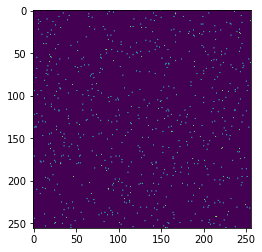

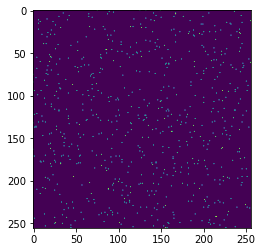

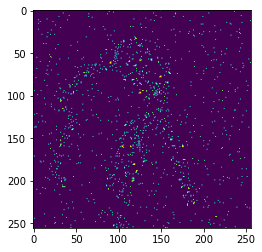

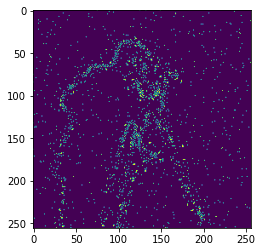

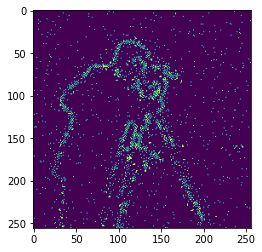

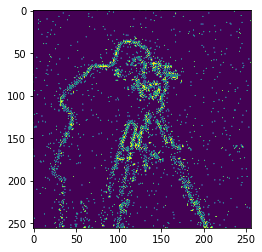

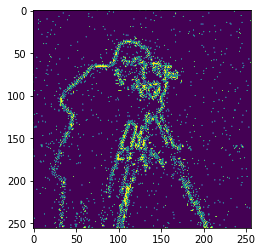

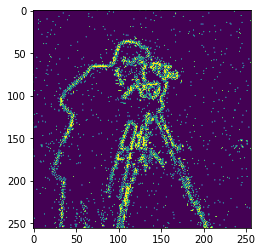

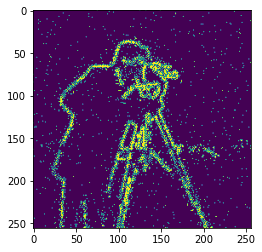

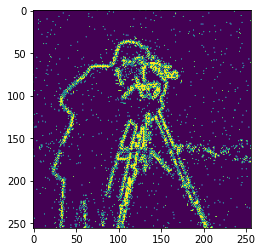

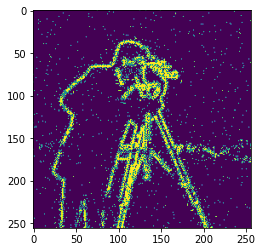

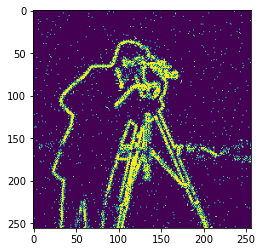

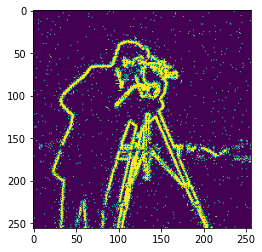

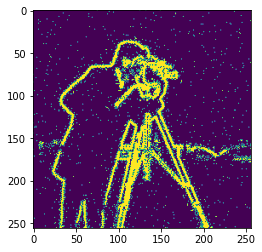

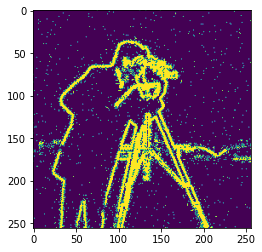

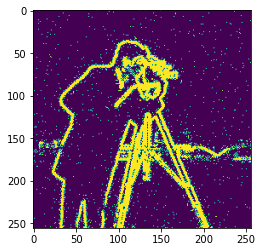

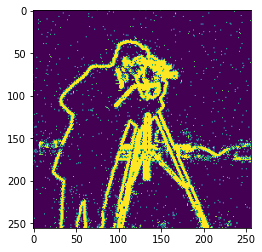

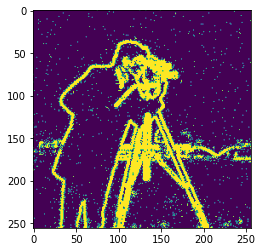

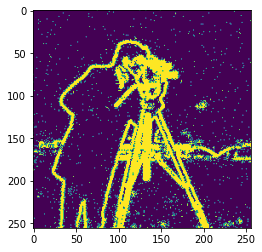

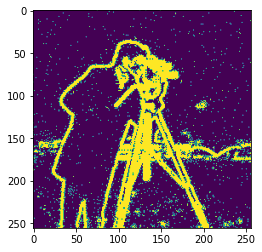

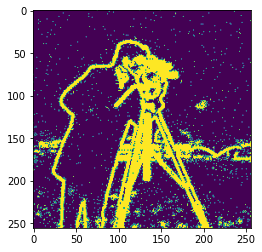

In [42]:
for mask in results.outputs.masks:
    plt.imshow(mask)
    plt.show()

In [43]:
errors = [(r - measurement_interface.image) for r in results.outputs.recons]

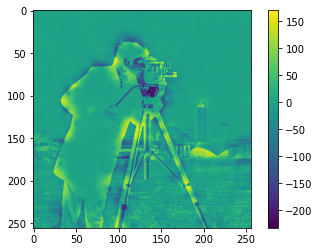

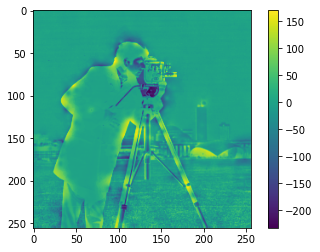

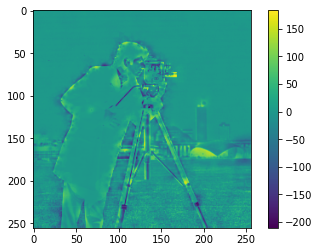

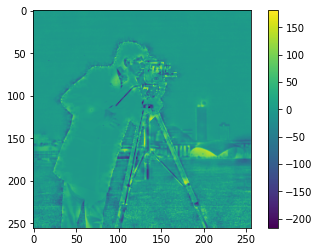

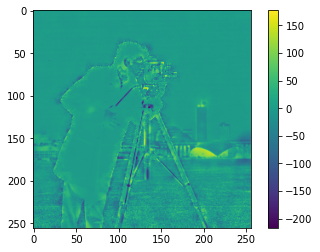

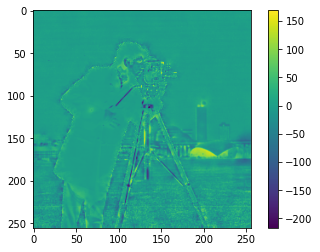

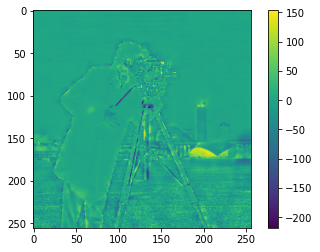

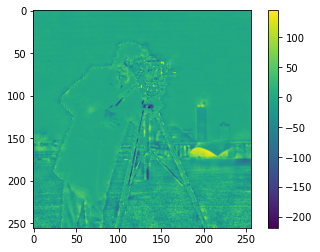

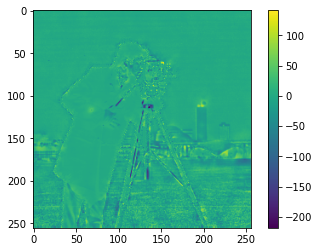

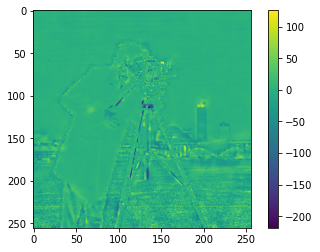

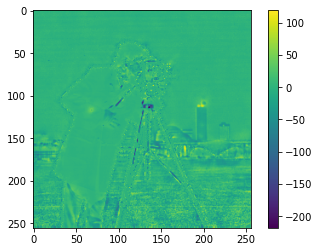

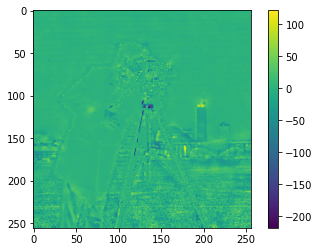

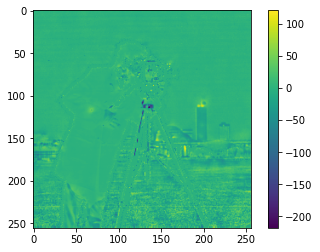

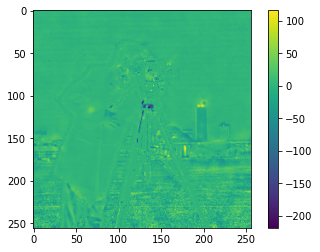

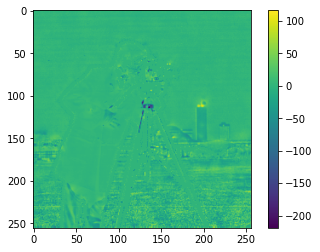

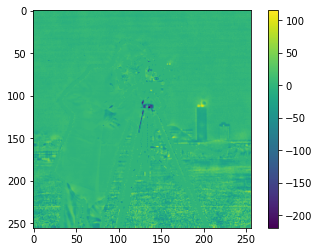

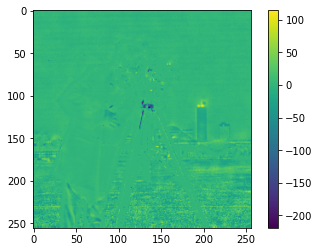

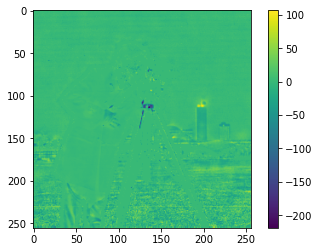

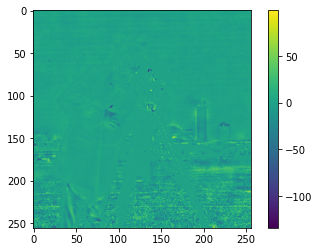

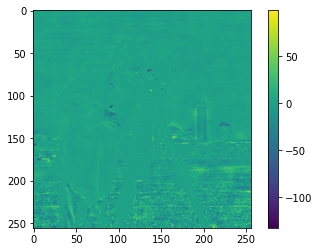

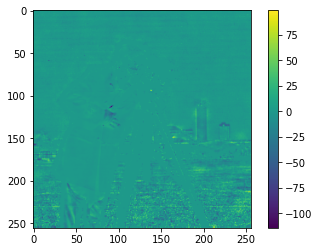

In [46]:
for er in errors:
    plt.imshow(er)
    plt.colorbar()
    plt.show()

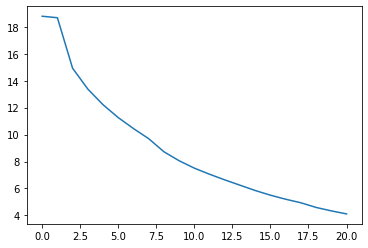

In [47]:
plt.plot(np.mean(np.abs(errors), axis=(1, 2)))

In [48]:
results.save(output_path / 'results.pkl')